<a href="https://colab.research.google.com/github/Ratikant-rout/NLP_CSE-D_ROLLNO-46-ROLLNO-37/blob/main/Project_Sentiment_Analysis_of_Hospital_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import pandas as pd

df = pd.read_csv('hospital.csv')
df.head()


,Feedback,Sentiment Label,Ratings,Unnamed: 3
0,Good and clean hospital. There is great team o...,1,5,NaN
1,Had a really bad experience during discharge. ...,1,5,NaN
2,I have visited to take my second dose and Proc...,1,4,NaN
3,That person was slightly clueless and offered...,1,3,NaN
4,There is great team of doctors and good OT fac...,0,1,NaN


In [24]:
# Install any missing libraries (if you're working on a fresh Colab environment)
!pip install scikit-learn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [26]:
df['cleaned_review'] = df['Feedback'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()


In [27]:
df['Sentiment Label'].value_counts()

,count
Sentiment Label,
1,728
0,268


In [28]:
# Features and labels
X = df['cleaned_review']  # The cleaned text
y = df['Sentiment Label']  # Sentiment labels (positive/negative)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
tfidf = TfidfVectorizer(max_features=5000)


X_train_tfidf = tfidf.fit_transform(X_train)


X_test_tfidf = tfidf.transform(X_test)


In [32]:

model = LogisticRegression()


model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [33]:

y_pred = model.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.94      0.50      0.65        58
           1       0.83      0.99      0.90       142

    accuracy                           0.84       200
   macro avg       0.88      0.74      0.78       200
weighted avg       0.86      0.84      0.83       200



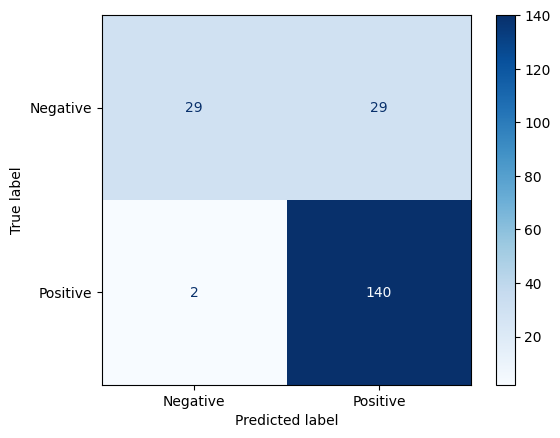

In [35]:
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.show()


In [37]:
import joblib

# Save the trained model and TF-IDF vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [40]:
"""
Summary of the Workflow:

Load data: Import and inspect the dataset.

Preprocess data: Clean the text.

Split data: Divide the data into training and testing sets.

Vectorize text: Use TF-IDF to convert text to numerical features.

Train model: Train a Logistic Regression model.

Make predictions: Predict sentiment on test data.

Evaluate performance: Use classification report and confusion matrix.

"""

'\nSummary of the Workflow:\n\nLoad data: Import and inspect the dataset.\n\nPreprocess data: Clean the text.\n\nSplit data: Divide the data into training and testing sets.\n\nVectorize text: Use TF-IDF to convert text to numerical features.\n\nTrain model: Train a Logistic Regression model.\n\nMake predictions: Predict sentiment on test data.\n\nEvaluate performance: Use classification report and confusion matrix.\n\n'

In [41]:
# Predict sentiment labels for all reviews
df['Predicted Sentiment'] = model.predict(tfidf.transform(df['cleaned_review']))

# Show a sample of the predicted sentiment (0 = Negative, 1 = Positive)
df[['Hospital', 'cleaned_review', 'Predicted Sentiment']].head()


,Hospital,cleaned_review,Predicted Sentiment
0,Sunshine Health,good and clean hospital there is great team of...,1
1,Metro Hospital,had a really bad experience during discharge t...,1
2,CityCare Hospital,i have visited to take my second dose and proc...,1
3,Lifeline Center,that person was slightly clueless and offered...,1
4,CityCare Hospital,there is great team of doctors and good ot fac...,1


In [42]:
# Group by hospital and calculate the number of positive reviews
hospital_sentiment = df[df['Predicted Sentiment'] == 1].groupby('Hospital').size()

# Sort hospitals by the number of positive reviews
top_hospitals = hospital_sentiment.sort_values(ascending=False).head(5)

# Show the top 5 hospitals with the highest number of positive reviews
top_hospitals


,0
Hospital,
CityCare Hospital,187
Green Valley Clinic,178
Sunshine Health,167
Lifeline Center,151
Metro Hospital,148


In [43]:
# Get the top 5 hospitals with the highest number of positive reviews
top_hospitals_list = top_hospitals.index.tolist()

# Filter the dataset to show only the top 5 hospitals
top_reviews = df[df['Hospital'].isin(top_hospitals_list) & (df['Predicted Sentiment'] == 1)]

# Show the top 5 positive reviews for each of the top hospitals
top_reviews_grouped = top_reviews.groupby('Hospital').head(5)

# Display the top 5 reviews for each hospital
top_reviews_grouped[['Hospital', 'cleaned_review', 'Predicted Sentiment']]


,Hospital,cleaned_review,Predicted Sentiment
0,Sunshine Health,good and clean hospital there is great team of...,1
1,Metro Hospital,had a really bad experience during discharge t...,1
2,CityCare Hospital,i have visited to take my second dose and proc...,1
3,Lifeline Center,that person was slightly clueless and offered...,1
4,CityCare Hospital,there is great team of doctors and good ot fac...,1
5,Green Valley Clinic,my primary concern arose from the insistence o...,1
6,Sunshine Health,good and clean hospital the medical facilitie...,1
7,CityCare Hospital,recently underwent a surgery for my left shoul...,1
8,Metro Hospital,over all experience was good starting from rec...,1
9,Sunshine Health,howeverthe services of front office where we r...,1


In [45]:
hospital_name = input("Enter a hospital name to see top 5 positive reviews: ")

hospital_reviews = top_reviews_grouped[top_reviews_grouped['Hospital'].str.contains(hospital_name, case=False)]

if not hospital_reviews.empty:
    print(hospital_reviews[['Hospital', 'cleaned_review', 'Predicted Sentiment']])
else:
    print("No reviews found for the specified hospital.")


Enter a hospital name to see top 5 positive reviews: CityCare
             Hospital                                     cleaned_review  \
2   CityCare Hospital  i have visited to take my second dose and proc...   
4   CityCare Hospital  there is great team of doctors and good ot fac...   
7   CityCare Hospital  recently underwent a surgery for my left shoul...   
18  CityCare Hospital  i was having menopause related issues and went...   
21  CityCare Hospital  say hello with folded handsand take the patien...   

    Predicted Sentiment  
2                     1  
4                     1  
7                     1  
18                    1  
21                    1  
